# PDF Power Hacks: Everything You Didn’t Know You Could Do with R and Your PDF Files  
### 🛡️ DIY in AI: Protect your data. Don’t upload it anywhere.

# 📊 R 🔄 | Reorder PDF Pages Any Way You Want 🔄📄  

## ❓Ever needed to rearrange pages in a PDF for a presentation or summary without starting from scratch? 🙃  
With R and qpdf, reorder your PDF pages locally — no cloud upload needed and no hassle.  

## 👉 Solution  
🔁 Easily reorder specific pages within a PDF.  
💡 Ideal for customizing deliverables or adjusting reports quickly.  

## 🔧 How does it work?  
📄 Generate a sample 5-page numbered PDF.  
🔀 Define a new page order, e.g., swapping first and last pages.  
📥 Create a new PDF with pages rearranged as desired using qpdf.  

## 🔎 Why does it matter?  
🚀 Speeds up workflow by avoiding document recreation.  
🛡️ Keeps full control of your files and shared info.  
📊 Makes summaries or extracts for different audiences effortlessly.  

## ✨ Real-world example:  
📑 Imagine having a report ordered chronologically but wanting to show the final summary first, then details.  
🔄 R lets you reorder pages in the PDF to achieve this, without recreating the file.  

## ⚙️ Business impact:  
💼 Quickly personalize client and stakeholder deliverables.  
⏱️ Saves time preparing reports.  
📬 Enhances user experience by delivering clear, well-organized information.  

## 📊 Summary  
📝 Creates a 5-page numbered PDF.  
🔀 Reorders pages (e.g., [4, 0, 1, 2, 3]).  
📄 Saves a reordered PDF without uploading it anywhere.  

🔗 [Github](https://github.com/jcombari/RForAll/tree/main/PDF%20Power%20Hacks)  

## 💭 Thought:  
How do you organize documents you share to maximize impact? What tricks do you use to improve clarity and effectiveness in your reports?

🔑 #RStats #DataScience #qpdf #PDFprocessing #Automation #DataPrivacy #TechForGood #CareerGrowth #AI #MachineLearning  

🔁 If you found this post useful, feel free to share it with your network.  
⚠️ Please do not copy or repost it as your own. Respect original work.

---

# PDF Power Hacks: Todo lo que no sabías que podías hacer con R y tus archivos PDF  
### 🛡️ DIY en IA: Protege tus datos. No los subas a ningún sitio.

# 📊 R 🔄 | Ordena páginas de un PDF como quieras 🔄📄  

## ❓ ¿Alguna vez quisiste reorganizar las páginas de un PDF para una presentación o resumen sin rehacerlo desde cero? 🙃  
Con R y qpdf, puedes cambiar el orden de las páginas localmente, sin subir tus datos a la nube ni complicarte.  

## 👉 Solución  
🔁 Reordena páginas específicas dentro de un PDF de manera sencilla.  
💡 Perfecto para preparar entregables personalizados o ajustar informes rápido.  

## 🔧 ¿Cómo funciona?  
📄 Generamos un PDF de ejemplo con 5 páginas numeradas.  
🔀 Definimos un nuevo orden de páginas, por ejemplo, intercambiando la primera con la última.  
📥 Creamos un PDF nuevo con las páginas en el orden que elegimos usando qpdf.  

## 🔎 ¿Por qué importa?  
🚀 Acelera tu flujo de trabajo al evitar rehacer documentos.  
🛡️ Mantén el control total sobre tus archivos y la información que compartes.  
📊 Facilita la creación de resúmenes o extractos para distintos públicos sin complicaciones.  

## ✨ Ejemplo real o Caso práctico:  
📑 Imagina que tienes un reporte con páginas en orden cronológico, pero quieres mostrar primero el resumen final y luego los detalles.  
🔄 Con R, solo reorganizas el PDF para lograr ese efecto, sin tener que recrearlo.  

## ⚙️ Impacto en el negocio:  
💼 Personaliza entregables para clientes y stakeholders con rapidez.  
⏱️ Optimiza el tiempo que dedicas a preparar reportes.  
📬 Mejora la experiencia del usuario al recibir información clara y bien organizada.  

## 📊 Resumen  
📝 Crea un PDF con 5 páginas numeradas.  
🔀 Reordena las páginas (ejemplo: [4, 0, 1, 2, 3]).  
📄 Guarda un nuevo PDF con el orden ajustado sin subirlo a la nube.  

🔗 [Github](https://github.com/jcombari/RForAll/tree/main/PDF%20Power%20Hacks)  

## 💭 Reflexión:  
¿Cómo organizas los documentos que compartes para que sean más efectivos? ¿Qué trucos usas para mejorar la claridad y el impacto en tus reportes?  

🔑 #RStats #DataScience #qpdf #PDFprocessing #Automation #DataPrivacy #TechForGood #CareerGrowth #AI #MachineLearning  

🔁 Si te ha parecido útil, siéntete libre de compartir esta publicación con tu red.  
⚠️ Por favor, no la copies ni la publiques como propia. Respeta el trabajo original.

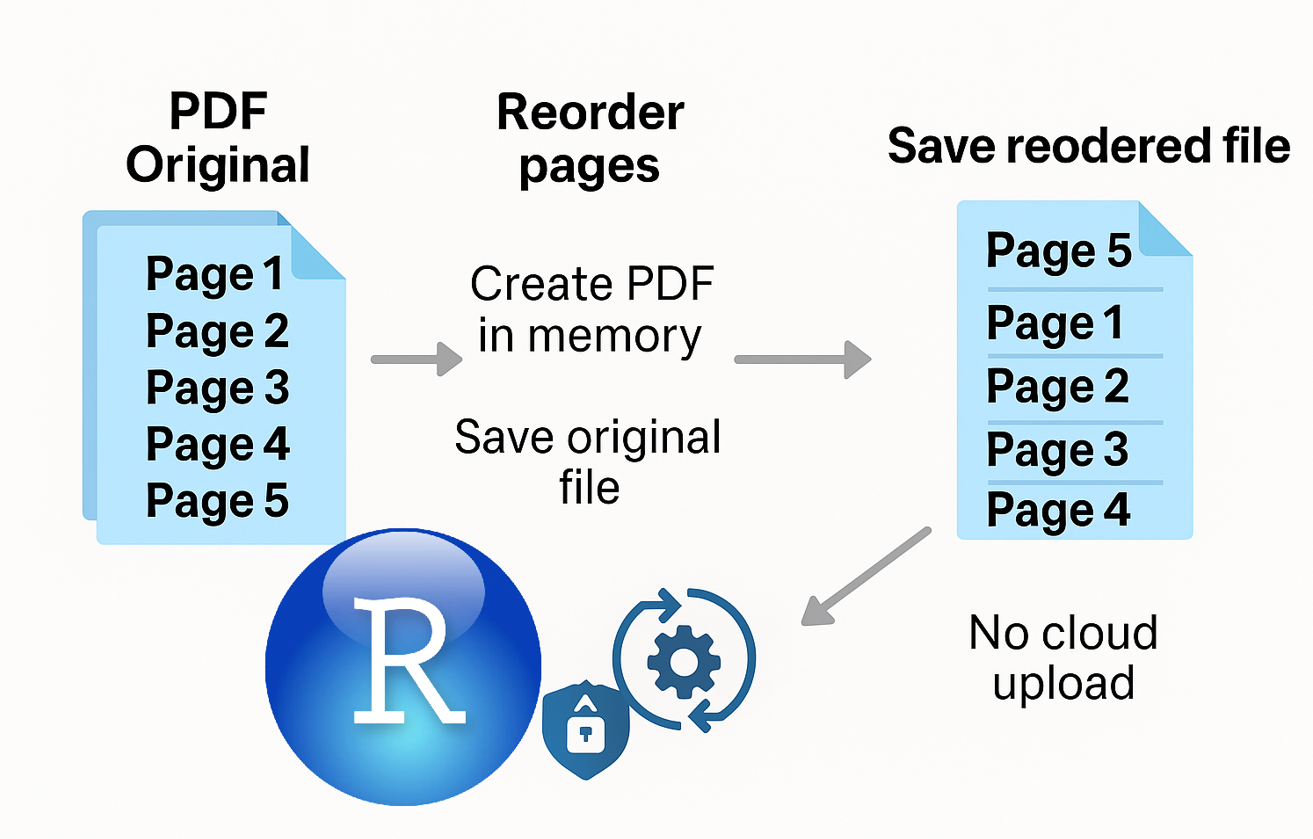


In [1]:
library(qpdf)    # Para manipular PDFs
library(glue)    # Para construir strings fácilmente (opcional)
suppressWarnings(suppressPackageStartupMessages(library(qpdf)))
suppressWarnings(suppressPackageStartupMessages(library(glue)))

create_sample_pdf <- function(file) {
  invisible(capture.output(pdf(file, width = 8.5, height = 11)))  # Silenciar salida
  for (page_num in 1:5) {
    plot.new()
    text(0.5, 0.5, labels = paste("Página", page_num), cex = 3)
  }
  invisible(capture.output(dev.off()))
}

save_pdf_with_date <- function(input_file, suffix_name) {
  date_prefix <- format(Sys.Date(), "%Y%m%d_")
  output_file <- paste0(date_prefix, suffix_name)
  file.copy(input_file, output_file, overwrite = TRUE)
  message("Archivo guardado: ", output_file)
  return(output_file)
}

reorder_pdf_pages <- function(input_file, new_order, output_file) {
  new_order_plus1 <- new_order + 1
  qpdf::pdf_subset(input_file, pages = new_order_plus1, output = output_file)
  return(output_file)
}

# ----------- Uso -------------

temp_pdf <- tempfile(fileext = ".pdf")
create_sample_pdf(temp_pdf)

file_original <- suppressMessages(save_pdf_with_date(temp_pdf, "original_sample.pdf"))

new_order <- c(4, 0, 1, 2, 3)
temp_reordered_pdf <- tempfile(fileext = ".pdf")
file_reordered <- reorder_pdf_pages(file_original, new_order, temp_reordered_pdf)
file_reordered <- suppressMessages(save_pdf_with_date(file_reordered, "reordered_sample.pdf"))


Warning message:
"package 'qpdf' was built under R version 4.4.3"
